,month,item_sale
0,2013-01,8.135506e+07
1,2013-02,9.479086e+07
2,2013-03,1.006548e+08
3,2013-04,7.524793e+07
4,2013-05,8.020317e+07


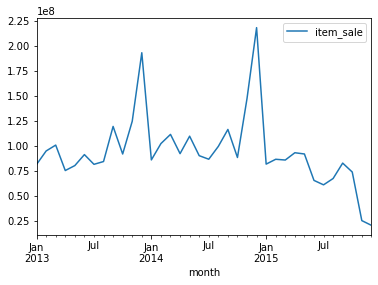

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame

    
df1 = pd.read_csv('sales_train.csv')
df2 = pd.read_csv('items.csv')


#add a column named item_sale
df3 = pd.merge(df1,df2).drop('item_name', axis=1)
df3['item_sale'] = df3.item_price*df3.item_cnt_day

#drop the colums not needed
df4 = df3.drop(['date_block_num','shop_id','item_id','item_price','item_cnt_day','item_category_id'],axis=1)

#Groupby on date
df5 = df4.groupby('date')['item_sale'].sum().reset_index()

df5['date']= pd.to_datetime(df5['date'])
#df5['month']=df5['date'].str.slice(3,)

df5['month'] = pd.to_datetime(df5['date']).dt.to_period('M')
df5['year'] = pd.DatetimeIndex(df5['date']).year

df6 = df5.groupby('date')['item_sale'].sum().reset_index()
df6['year'] = pd.DatetimeIndex(df6['date']).year
df6 = df6.sort_values('date')

#groupby on month
df7 = df5.groupby('month')['item_sale'].sum().reset_index()

#df6.plot(x='month',y='item_sale')
df7.plot(x='month',y='item_sale')
df7.head()


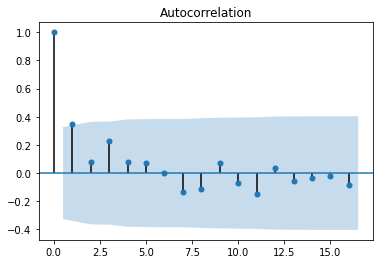

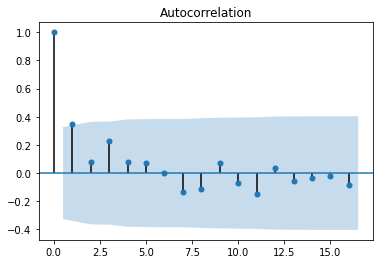

In [3]:
#stationarity test
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(df7['item_sale'])
plot_acf(df7['item_sale'])

In [4]:
#Train and test data
M = df7['item_sale'].values
df7_train = M[0:23]
df7_test = M[24:35]

835.2355807022956


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


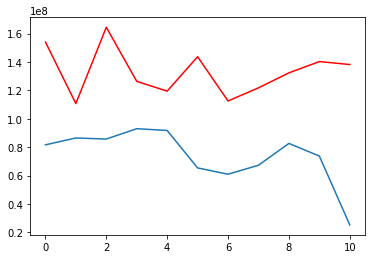

In [6]:
#Arima
from statsmodels.tsa.arima_model import ARIMA
model_df7 = ARIMA(df7_train, order=(8,1,4))
model_df7_fit = model_df7.fit()

pred_df7 = model_df7_fit.forecast(steps=11)[0]

plt.plot(df7_test)
plt.plot(pred_df7, color='red')
print(model_df7_fit.aic)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


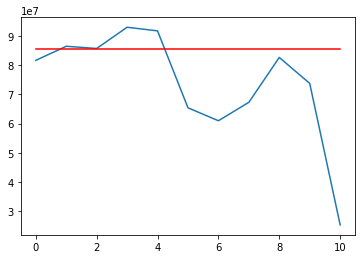

In [7]:
#ETS model-1
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model_df7_ETS = SimpleExpSmoothing(np.asarray(df7_train))
model_df7_fit_ETS = model_df7_ETS.fit(smoothing_level=.01)
pred1_df7 = model_df7_fit_ETS.forecast(11)
plt.plot(df7_test)
plt.plot(pred1_df7, color='red')

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


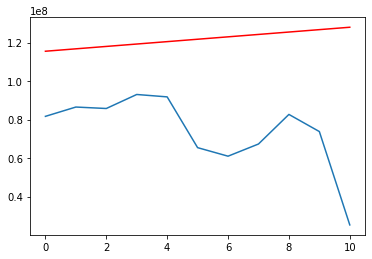

In [9]:
#ETS model-2
model1_df7_ETS = Holt(np.asarray(df7_train))

model1_df7_ETS_fit = model1_df7_ETS.fit(smoothing_level=0.31, smoothing_slope=.1)

pred2_df7 = model1_df7_ETS_fit.forecast(11)

plt.plot(df7_test)
plt.plot(pred2_df7, color='red')